In [402]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt 
from statsmodels. tsa.stattools import adfuller
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [403]:
df = pd.read_csv("/content/AAP_data.csv", parse_dates=['date'], index_col=['date'])
df.drop('Name', axis= 1 , inplace= True)
df.head(21)

,open,high,low,close,volume
date,,,,,
2013-02-08,78.34,79.720,78.0100,78.90,1298137
2013-02-11,78.65,78.910,77.2300,78.39,758016
2013-02-12,78.39,78.630,77.5132,78.60,876859
2013-02-13,78.90,79.130,77.8500,78.97,1038574
2013-02-14,78.66,79.720,78.5850,78.84,1005376
2013-02-15,78.83,79.180,77.9300,79.00,1247063
2013-02-19,79.12,81.440,78.5700,80.72,1730690
2013-02-20,80.42,80.940,79.3900,79.50,648693
2013-02-21,79.26,80.050,78.5600,79.06,915160


In [404]:
adfuller(df.open)

(-1.85814495839199,
 0.35199978922049246,
 0,
 1258,
 {'1%': -3.4355588184378574,
  '5%': -2.8638402312881497,
  '10%': -2.5679946684494275},
 5751.5590869153275)

In [405]:
adfuller(df.high)

(-1.8177477608788513,
 0.3716866995636672,
 0,
 1258,
 {'1%': -3.4355588184378574,
  '5%': -2.8638402312881497,
  '10%': -2.5679946684494275},
 5661.88111020764)

In [406]:
adfuller(df.low)

(-1.9146139633028787,
 0.3252177796238077,
 0,
 1258,
 {'1%': -3.4355588184378574,
  '5%': -2.8638402312881497,
  '10%': -2.5679946684494275},
 5908.331629392835)

In [407]:
adfuller(df.close)

(-1.7863740362193679,
 0.38724728162952976,
 5,
 1253,
 {'1%': -3.4355796466416777,
  '5%': -2.863849421064024,
  '10%': -2.5679995625056926},
 5773.665955366652)

In [408]:
adfuller(df.volume)

(-14.320405601866899,
 1.1438424578271111e-26,
 2,
 1256,
 {'1%': -3.4355671297788666,
  '5%': -2.8638438984080117,
  '10%': -2.5679966213893057},
 37446.21463104718)

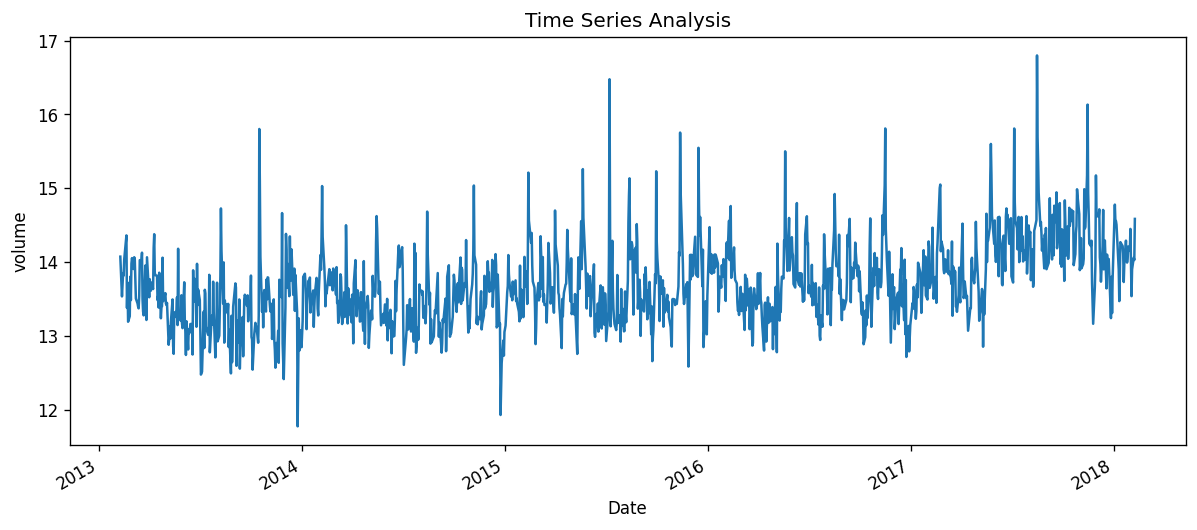

In [409]:
df.volume = np.log(df.volume)
df.volume.plot()
plt.title('Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('volume')
plt.show()

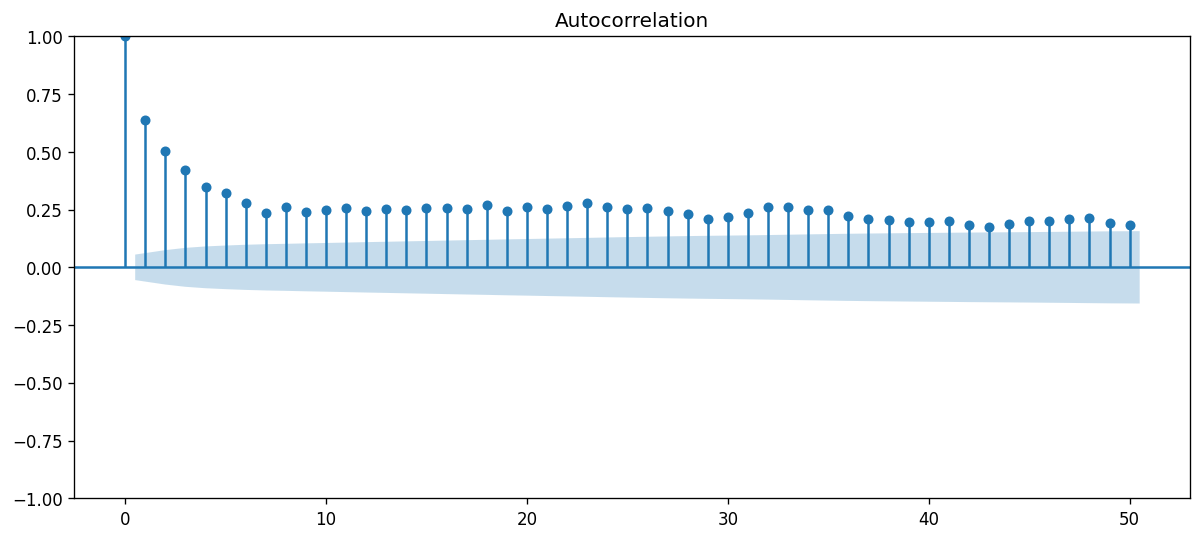

In [410]:
plot_acf(df['volume'], lags=50)
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


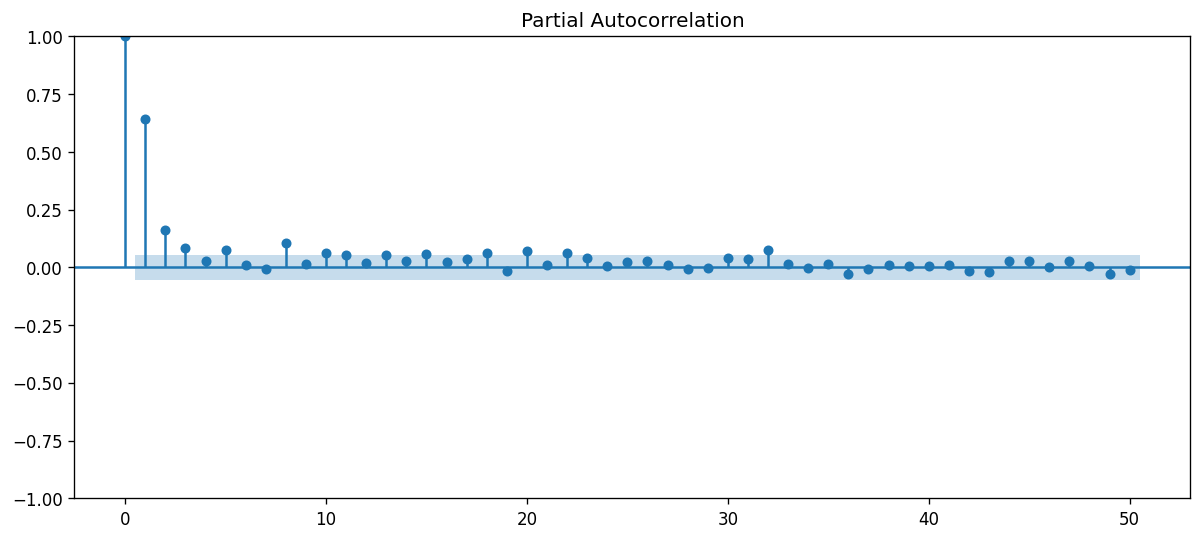

In [411]:
plot_pacf(df['volume'], lags=50)
plt.show()

In [412]:
dfr = pd.read_csv("/content/AAP_data.csv", parse_dates=['date'], index_col=['date'])
dfr.drop('Name', axis= 1 , inplace= True)
dfr.drop('open', axis= 1 , inplace= True)
dfr.drop('high', axis= 1 , inplace= True)
dfr.drop('low', axis= 1 , inplace= True)
dfr.drop('close', axis= 1 , inplace= True)
dfr

,volume
date,
2013-02-08,1298137
2013-02-11,758016
2013-02-12,876859
2013-02-13,1038574
2013-02-14,1005376
...,...
2018-02-01,760629
2018-02-02,1092333
2018-02-05,1281592


In [413]:
dfr.volume = np.log(dfr.volume)

In [414]:
model = ARIMA(dfr, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=10)
pred = model_fit.predict(start='2016-02', end = '2018-02')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


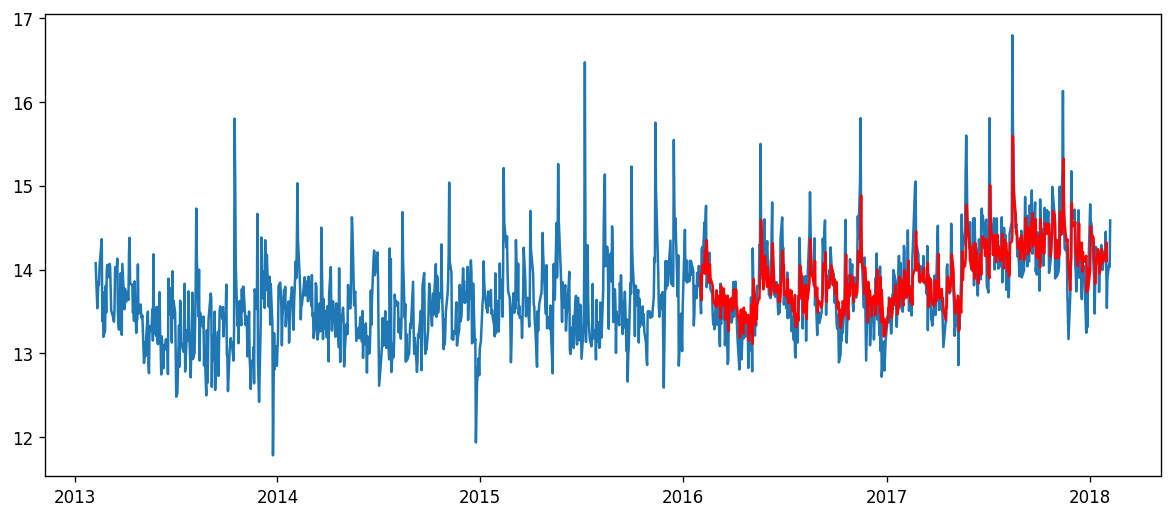

In [415]:
plt.plot(dfr)
plt.plot(pred, color ='red')
plt.show()

In [416]:

mae = mean_absolute_error(dfr['2016-02-05' : '2018-02-07'], pred)
mse = mean_squared_error(dfr['2016-02-05' : '2018-02-07'], pred)

print('MAE: %.3f' % mae)
print('MSE: %.3f' % mse)

MAE: 0.387
MSE: 0.265


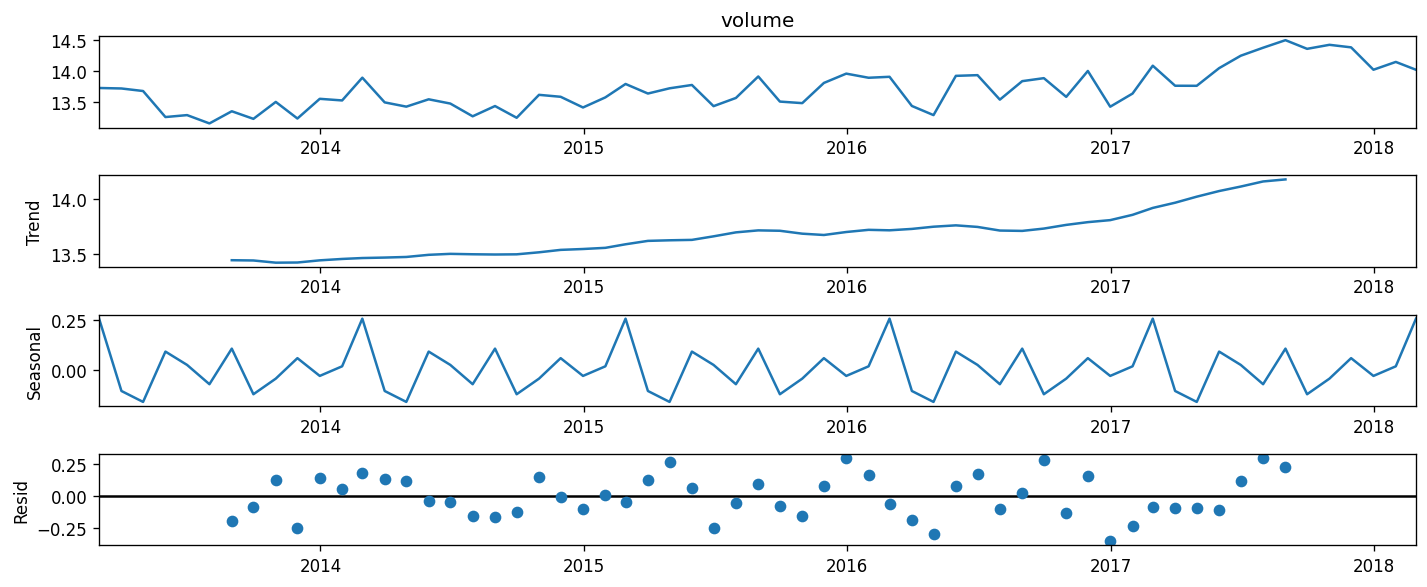

In [417]:
dfr = dfr.resample('M').mean()
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
sm.tsa.seasonal_decompose(dfr.volume).plot() 
plt.show()